In [2]:
import pandas as pd
import numpy as np

# 2. Define a list of suburbs for Sydney
suburbs = ['Bondi Beach', 'Manly', 'Sydney CBD', 'Parramatta', 'Newtown', 'Surry Hills', 'Coogee', 'Chatswood']

# 3. Define a list of property types
property_types = ['Entire Home', 'Private Room']

# 4. Define a list of host statuses
host_statuses = ['Superhost', 'Regular']

# 5. Create a DataFrame for 1,500 listings
num_listings = 1500

data = {
    'Listing_ID': range(1, num_listings + 1),
    'Suburb': np.random.choice(suburbs, num_listings),
    'Property_Type': np.random.choice(property_types, num_listings),
    'Host_Status': np.random.choice(host_statuses, num_listings),
    'Number_of_Reviews': np.random.randint(0, 501, num_listings) # 501 because randint is exclusive of the upper bound
}

df = pd.DataFrame(data)

# 6. Display the first 5 rows of the created DataFrame
print("Generated DataFrame head:")
df.head()

Generated DataFrame head:


,Listing_ID,Suburb,Property_Type,Host_Status,Number_of_Reviews
0,1,Chatswood,Private Room,Superhost,131
1,2,Sydney CBD,Private Room,Superhost,360
2,3,Parramatta,Private Room,Superhost,492
3,4,Chatswood,Entire Home,Regular,254
4,5,Surry Hills,Entire Home,Superhost,328


In [3]:
premium_suburbs = ['Bondi Beach', 'Manly', 'Sydney CBD']

def assign_purchase_cost(row):
    if row['Suburb'] in premium_suburbs:
        return np.random.uniform(1200000, 3000000) # Premium suburbs range
    else:
        return np.random.uniform(600000, 1500000) # Other suburbs range

df['Property_Purchase_Cost'] = df.apply(assign_purchase_cost, axis=1)

print("DataFrame with Property_Purchase_Cost added:")
df.head()

DataFrame with Property_Purchase_Cost added:


,Listing_ID,Suburb,Property_Type,Host_Status,Number_of_Reviews,Property_Purchase_Cost
0,1,Chatswood,Private Room,Superhost,131,9.758835e+05
1,2,Sydney CBD,Private Room,Superhost,360,2.293618e+06
2,3,Parramatta,Private Room,Superhost,492,7.197882e+05
3,4,Chatswood,Entire Home,Regular,254,9.123744e+05
4,5,Surry Hills,Entire Home,Superhost,328,1.258791e+06


In [4]:
premium_suburbs = ['Bondi Beach', 'Manly', 'Sydney CBD']

def assign_nightly_price(row):
    if row['Suburb'] in premium_suburbs:
        # Premium suburbs
        if row['Property_Type'] == 'Private Room':
            price = np.random.uniform(250, 400) # Private Room in premium suburbs
        else: # Entire Home
            base_price = np.random.uniform(250, 400)
            price = base_price * 3 # Entire Home is 3x Private Room
    else:
        # Other suburbs
        if row['Property_Type'] == 'Private Room':
            price = np.random.uniform(100, 250) # Private Room in other suburbs
        else: # Entire Home
            base_price = np.random.uniform(100, 250)
            price = base_price * 3 # Entire Home is 3x Private Room

    return np.clip(price, 100, 1200) # Ensure price is between $100 and $1,200

df['Nightly_Price'] = df.apply(assign_nightly_price, axis=1)

print("DataFrame with 'Nightly_Price' added:")
df.head()

DataFrame with 'Nightly_Price' added:


,Listing_ID,Suburb,Property_Type,Host_Status,Number_of_Reviews,Property_Purchase_Cost,Nightly_Price
0,1,Chatswood,Private Room,Superhost,131,9.758835e+05,206.617160
1,2,Sydney CBD,Private Room,Superhost,360,2.293618e+06,295.552900
2,3,Parramatta,Private Room,Superhost,492,7.197882e+05,174.518217
3,4,Chatswood,Entire Home,Regular,254,9.123744e+05,731.518878
4,5,Surry Hills,Entire Home,Superhost,328,1.258791e+06,571.631967


In [5]:
def assign_occupancy_rate(row):
    # Base occupancy rate for 'Regular' hosts
    base_occupancy_rate = np.random.uniform(0.40, 0.80) # Allows Superhost rates to be higher without exceeding 0.90

    if row['Host_Status'] == 'Superhost':
        occupancy_rate = base_occupancy_rate * 1.1 # 10% higher for Superhosts
    else:
        occupancy_rate = base_occupancy_rate

    # Ensure the occupancy rate does not exceed 0.90 and is not less than 0.40
    return np.clip(occupancy_rate, 0.40, 0.90)

df['Occupancy_Rate'] = df.apply(assign_occupancy_rate, axis=1)

print("DataFrame with 'Occupancy_Rate' added:")
df.head()

DataFrame with 'Occupancy_Rate' added:


,Listing_ID,Suburb,Property_Type,Host_Status,Number_of_Reviews,Property_Purchase_Cost,Nightly_Price,Occupancy_Rate
0,1,Chatswood,Private Room,Superhost,131,9.758835e+05,206.617160,0.875948
1,2,Sydney CBD,Private Room,Superhost,360,2.293618e+06,295.552900,0.733739
2,3,Parramatta,Private Room,Superhost,492,7.197882e+05,174.518217,0.853519
3,4,Chatswood,Entire Home,Regular,254,9.123744e+05,731.518878,0.789079
4,5,Surry Hills,Entire Home,Superhost,328,1.258791e+06,571.631967,0.577483


In [6]:
df['Monthly_Revenue'] = df['Nightly_Price'] * 30 * df['Occupancy_Rate']
df['Annual_Yield'] = (df['Monthly_Revenue'] * 12) / df['Property_Purchase_Cost']

print("DataFrame with 'Monthly_Revenue' and 'Annual_Yield' added:")
df.head()

DataFrame with 'Monthly_Revenue' and 'Annual_Yield' added:


,Listing_ID,Suburb,Property_Type,Host_Status,Number_of_Reviews,Property_Purchase_Cost,Nightly_Price,Occupancy_Rate,Monthly_Revenue,Annual_Yield
0,1,Chatswood,Private Room,Superhost,131,9.758835e+05,206.617160,0.875948,5429.576678,0.066765
1,2,Sydney CBD,Private Room,Superhost,360,2.293618e+06,295.552900,0.733739,6505.761363,0.034038
2,3,Parramatta,Private Room,Superhost,492,7.197882e+05,174.518217,0.853519,4468.637678,0.074499
3,4,Chatswood,Entire Home,Regular,254,9.123744e+05,731.518878,0.789079,17316.775556,0.227759
4,5,Surry Hills,Entire Home,Superhost,328,1.258791e+06,571.631967,0.577483,9903.228181,0.094407


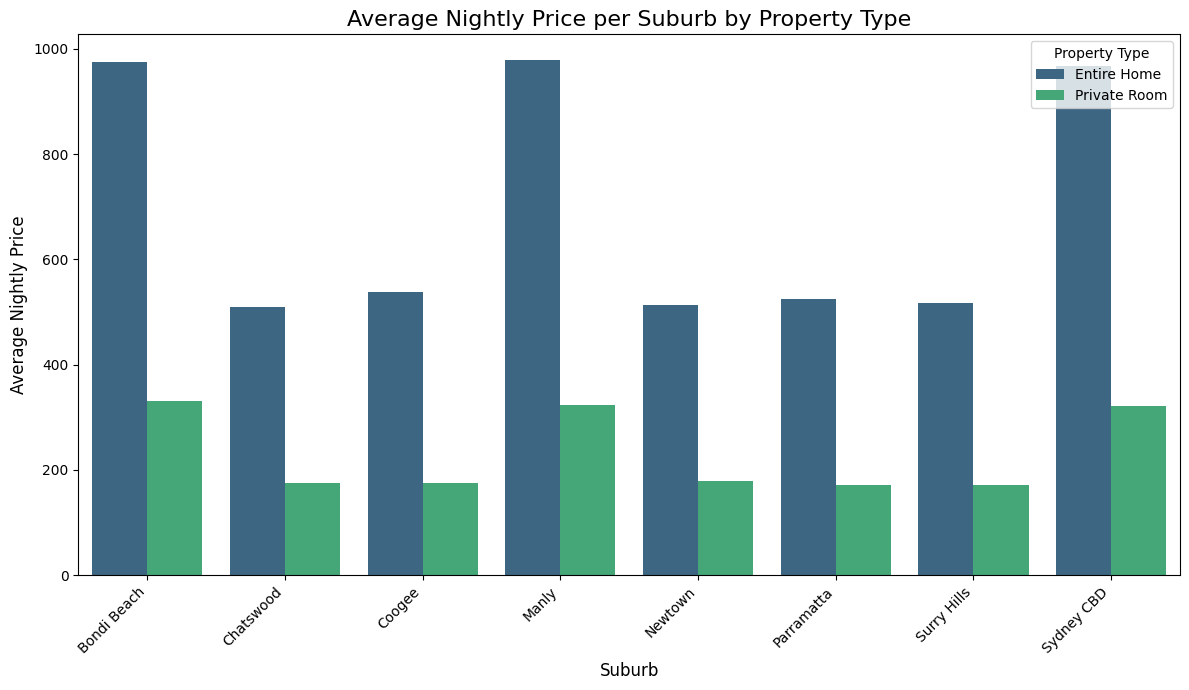

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Suburb' and 'Property_Type' and calculate the mean of 'Nightly_Price'
avg_price_per_suburb_property = df.groupby(['Suburb', 'Property_Type'])['Nightly_Price'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(data=avg_price_per_suburb_property, x='Suburb', y='Nightly_Price', hue='Property_Type', palette='viridis')

# Set title and labels
plt.title('Average Nightly Price per Suburb by Property Type', fontsize=16)
plt.xlabel('Suburb', fontsize=12)
plt.ylabel('Average Nightly Price', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Property Type')

# Display the plot
plt.tight_layout()
plt.show()

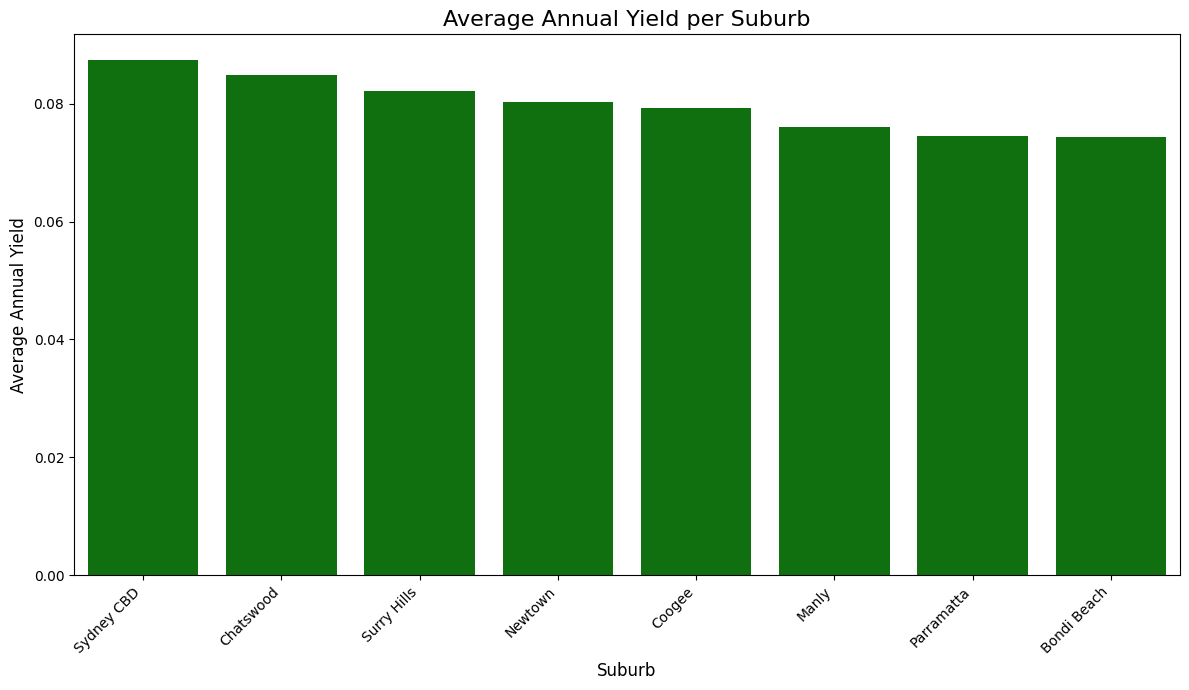

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the mean of the 'Annual_Yield' for each 'Suburb'
# 2. Convert the grouped result back into a DataFrame
# 3. Sort this new DataFrame in descending order based on the 'Annual_Yield' column.
avg_yield_per_suburb = df.groupby('Suburb')['Annual_Yield'].mean().reset_index().sort_values(by='Annual_Yield', ascending=False)

# 4. Create a bar plot using seaborn.barplot
plt.figure(figsize=(12, 7))
sns.barplot(x='Suburb', y='Annual_Yield', data=avg_yield_per_suburb, color='green')

# 5. Add a title to the plot
plt.title('Average Annual Yield per Suburb', fontsize=16)

# 6. Label the x-axis and y-axis
plt.xlabel('Suburb', fontsize=12)
plt.ylabel('Average Annual Yield', fontsize=12)

# 7. Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45, ha='right')

# 8. Display the plot
plt.tight_layout()
plt.show()


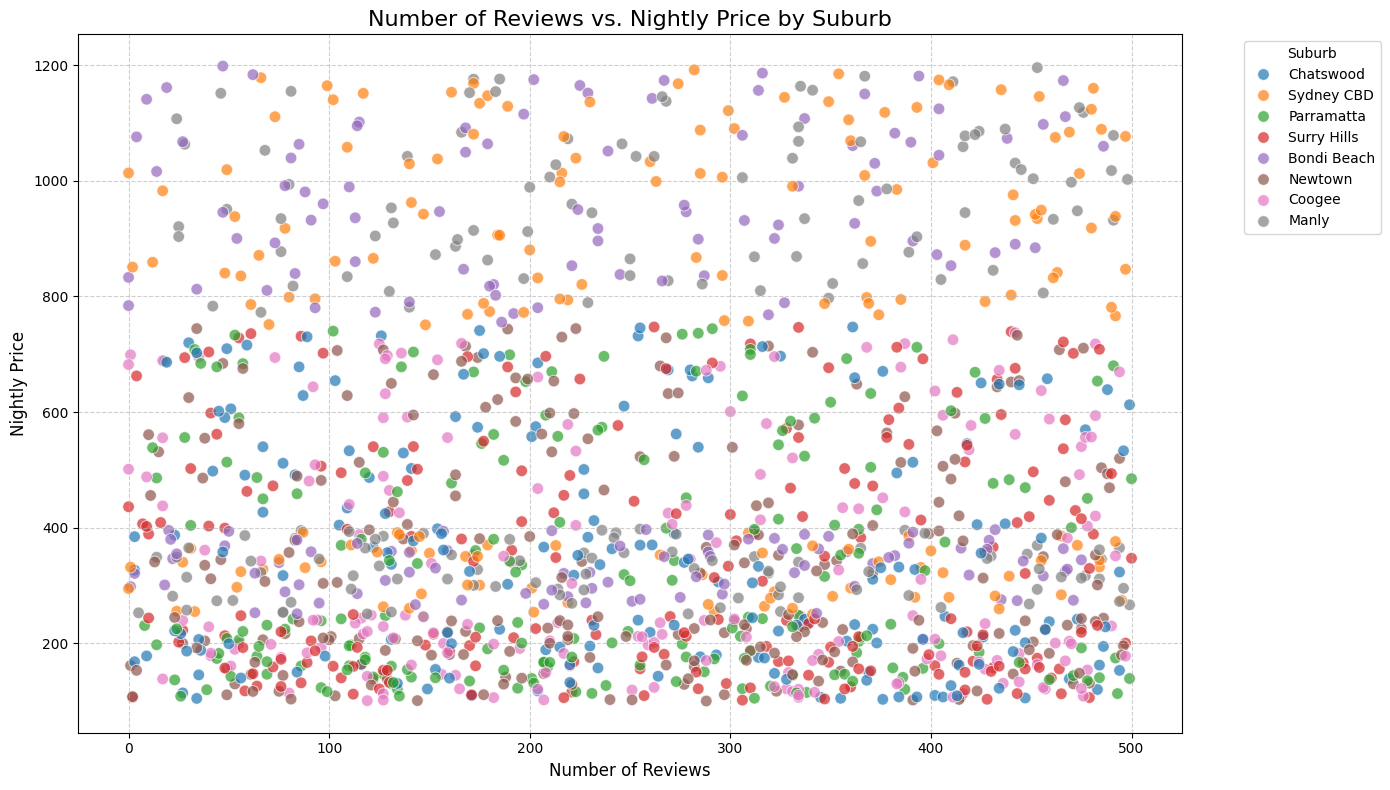

In [9]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Number_of_Reviews', y='Nightly_Price', hue='Suburb', palette='tab10', s=70, alpha=0.7)

plt.title('Number of Reviews vs. Nightly Price by Suburb', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Nightly Price', fontsize=12)
plt.legend(title='Suburb', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1900080357.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Host_Status', y='Monthly_Revenue', data=df, palette='pastel')


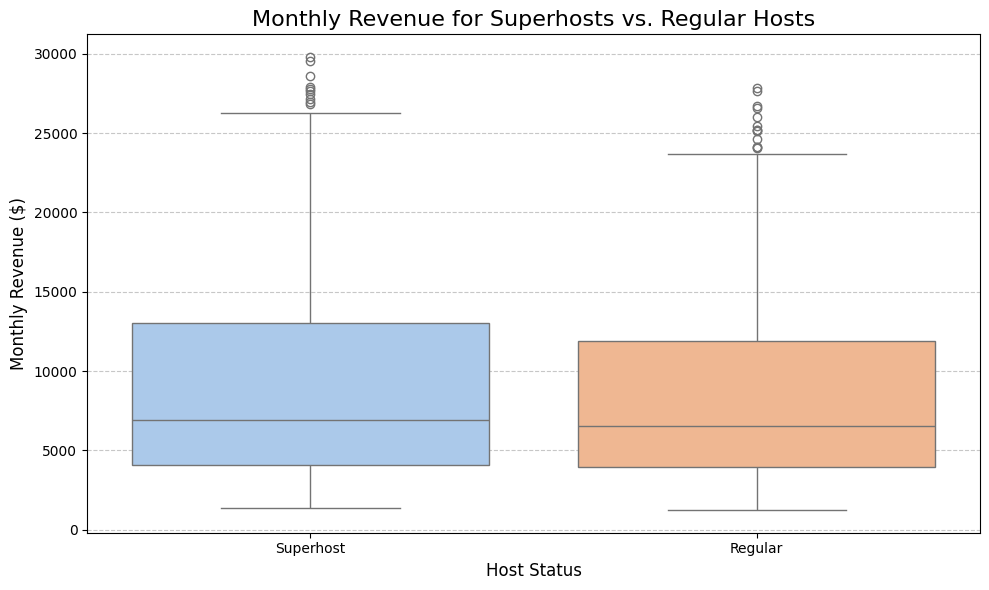

Becoming a Superhost adds $893.86 to monthly revenue.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Box Plot comparing Monthly_Revenue for Superhosts vs. Regular Hosts
plt.figure(figsize=(10, 6))
sns.boxplot(x='Host_Status', y='Monthly_Revenue', data=df, palette='pastel')
plt.title('Monthly Revenue for Superhosts vs. Regular Hosts', fontsize=16)
plt.xlabel('Host Status', fontsize=12)
plt.ylabel('Monthly Revenue ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate the average monthly revenue for each host status
average_revenue_superhost = df[df['Host_Status'] == 'Superhost']['Monthly_Revenue'].mean()
average_revenue_regular = df[df['Host_Status'] == 'Regular']['Monthly_Revenue'].mean()

# Calculate the average revenue difference
revenue_difference = average_revenue_superhost - average_revenue_regular

# Print the average revenue difference in dollars
print(f"Becoming a Superhost adds ${revenue_difference:.2f} to monthly revenue.")
